In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
data_dir = '/content/drive/MyDrive/dataset'


In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [ ]:
train_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='binary',
    shuffle=True
)


Found 546 images belonging to 2 classes.


In [ ]:
val_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='binary',
    shuffle=True
)


Found 135 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)

print(images.shape)   # (32, 224, 224, 3)
print(labels.shape)   # (32,)


(32, 224, 224, 3)
(32,)


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

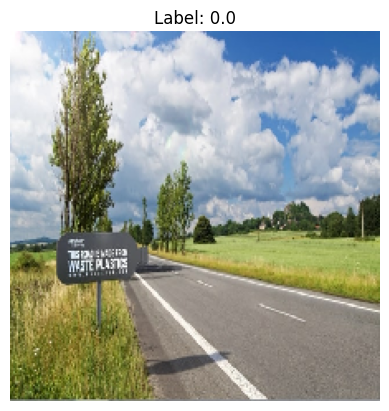

In [ ]:
plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.axis("off")


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.7277 - loss: 0.5350 - val_accuracy: 0.9185 - val_loss: 0.2680
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9074 - loss: 0.2714 - val_accuracy: 0.9556 - val_loss: 0.1818
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9598 - loss: 0.1629 - val_accuracy: 0.9556 - val_loss: 0.1483
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9651 - loss: 0.1444 - val_accuracy: 0.9556 - val_loss: 0.1354
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9711 - loss: 0.1080 - val_accuracy: 0.9630 - val_loss: 0.1245


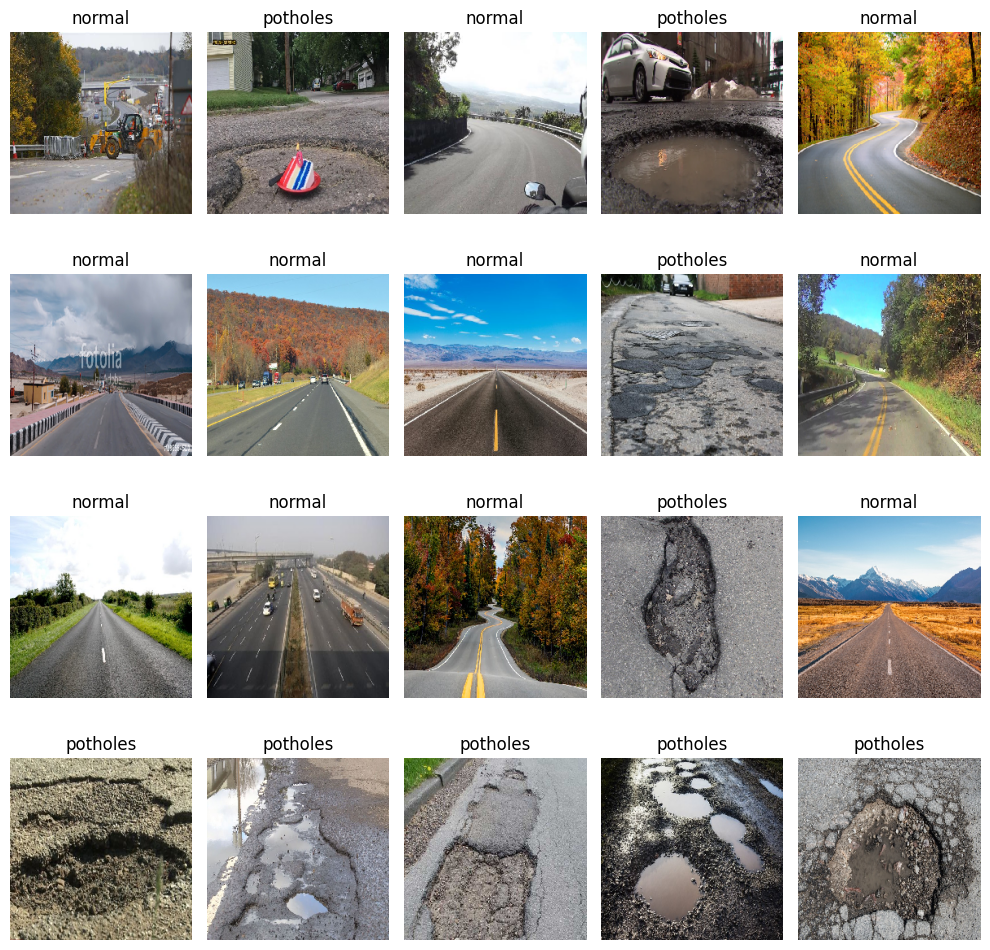

In [ ]:
# Plotting random images from the dataset

class_names = ['normal', 'potholes']

def plot_random_images():
    images, labels = next(train_data)   # ✅ FIXED
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize=(10, 10))

    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()
    plt.show()

plot_random_images()


MoblieNet Model


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Loading MobileNetV2 pre-trained on ImageNet data
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freezing the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Creating a custom model on top of MobileNetV2
mobilenet_model = models.Sequential()
mobilenet_model.add(base_model)
mobilenet_model.add(layers.GlobalAveragePooling2D())
mobilenet_model.add(layers.Dense(256, activation='relu'))
mobilenet_model.add(layers.Dropout(0.5))
mobilenet_model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Displaying the model summary
mobilenet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Training the model
history_mobilenet = mobilenet_model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7662 - loss: 0.4484 - val_accuracy: 0.9481 - val_loss: 0.1023
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9565 - loss: 0.1391 - val_accuracy: 0.9481 - val_loss: 0.1296
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9420 - loss: 0.1383 - val_accuracy: 0.9407 - val_loss: 0.1186
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9800 - loss: 0.0461 - val_accuracy: 0.9407 - val_loss: 0.1264
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9814 - loss: 0.0394 - val_accuracy: 0.9407 - val_loss: 0.1445
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9733 - loss: 0.0567 - val_accuracy: 0.9407 - val_loss: 0.1155
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9913 - loss: 0.0227 - val_accuracy: 0.9333 - val_loss: 0.1121
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9925 - loss: 0.0227 - val_accuracy: 0.9481 - val_loss:

In [ ]:
# Evaluating the model
mobilenet_accuracy = mobilenet_model.evaluate(val_data)[1]
print(f'Test accuracy: {mobilenet_accuracy * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9528 - loss: 0.1074
Test accuracy: 94.81%


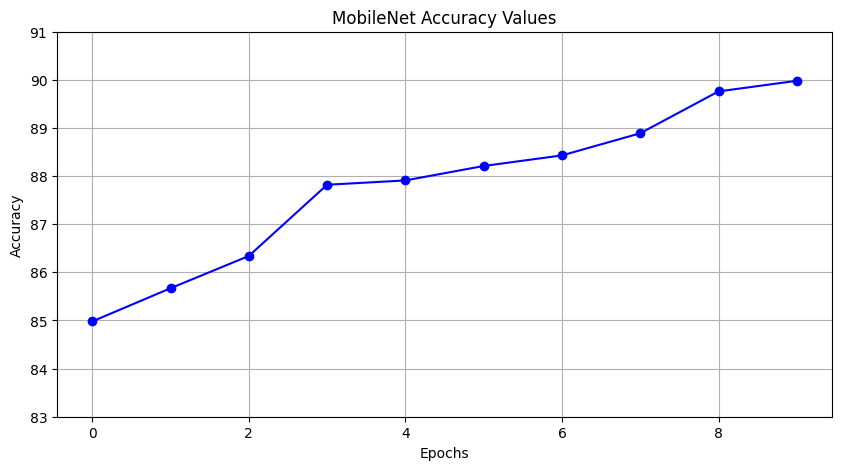

In [ ]:
accuracies = [84.98, 85.67, 86.34, 87.82, 87.91, 88.21, 88.43, 88.89, 89.76, 89.98]

# Plotting the accuracy values
plt.figure(figsize=(10, 5))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('MobileNet Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim(83, 91)
plt.show()

ResNet Model


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Loading ResNet50 pre-trained on ImageNet data
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freezing the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Creating a custom model on top of ResNet50
resnet_model = models.Sequential()
resnet_model.add(base_model)
resnet_model.add(layers.GlobalAveragePooling2D())
resnet_model.add(layers.Dense(256, activation='relu'))
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Displaying the model summary
resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# =========================
# 1. MOUNT GOOGLE DRIVE
# =========================
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# =========================
# 2. IMPORT LIBRARIES
# =========================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# =========================
# 3. DATASET PATH
# =========================
data_dir = '/content/drive/MyDrive/pothole dataset'



In [ ]:


# =========================
# 4. CLEAN CORRUPTED IMAGES
# =========================
def clean_dataset(directory):
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
        for img in os.listdir(class_path):
            img_path = os.path.join(class_path, img)
            try:
                Image.open(img_path).verify()
            except:
                print("Removing corrupted file:", img_path)
                os.remove(img_path)

clean_dataset(data_dir)



In [ ]:
# =========================
# 5. IMAGE DATA GENERATOR
# =========================
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='binary',
    shuffle=True
)

val_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='binary',
    shuffle=True
)

print("Class indices:", train_data.class_indices)



Found 544 images belonging to 2 classes.
Found 135 images belonging to 2 classes.
Class indices: {'normal': 0, 'potholes': 1}


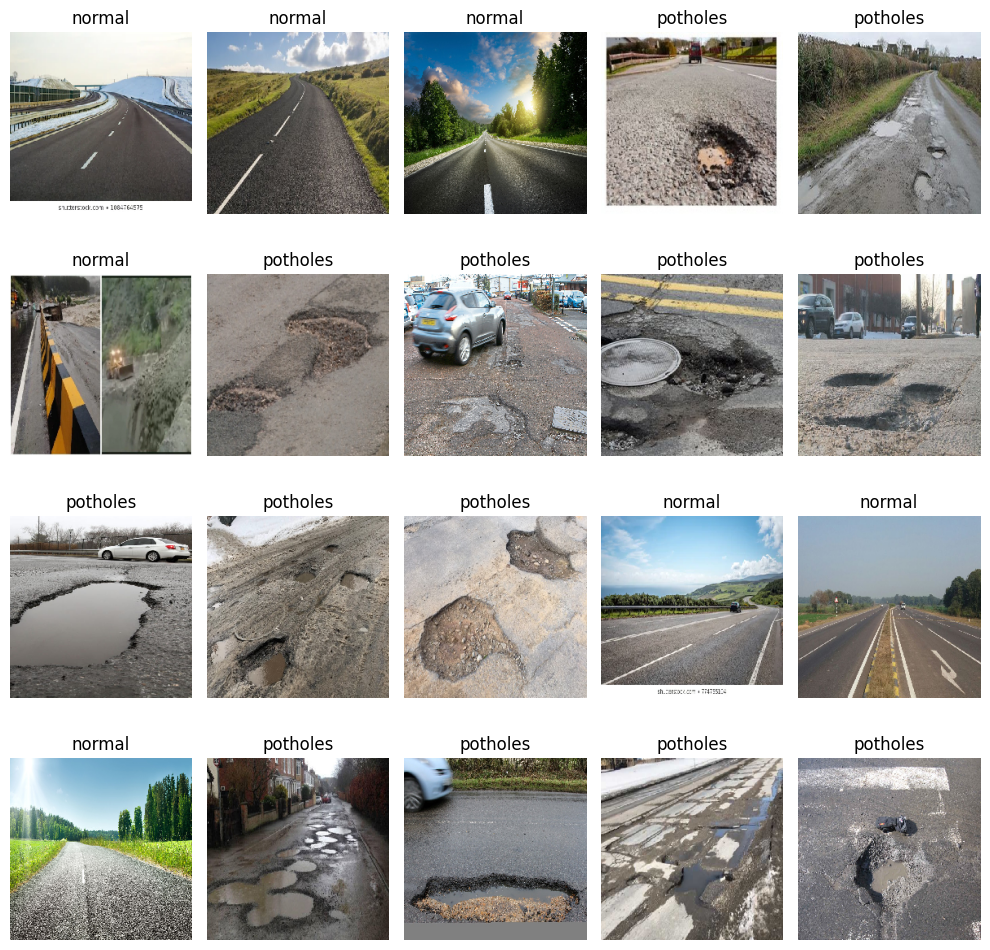

In [ ]:
# =========================
# 6. VISUALIZE SAMPLE IMAGES
# =========================
class_names = list(train_data.class_indices.keys())

images, labels = next(train_data)
labels = labels.astype('int32')

plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
# =========================
# 7. BUILD RESNET50 MODEL
# =========================
base_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

resnet_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

resnet_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:

# =========================
# 8. TRAIN MODEL
# =========================
history = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.5249 - loss: 0.8165 - val_accuracy: 0.5185 - val_loss: 0.7169
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 119s 7s/step - accuracy: 0.5774 - loss: 0.7012 - val_accuracy: 0.6000 - val_loss: 0.6585
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 138s 8s/step - accuracy: 0.6052 - loss: 0.6599 - val_accuracy: 0.5185 - val_loss: 0.6681
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 119s 7s/step - accuracy: 0.5890 - loss: 0.6716 - val_accuracy: 0.7111 - val_loss: 0.6417
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accuracy: 0.6561 - loss: 0.6248 - val_accuracy: 0.7111 - val_loss: 0.6293
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accuracy: 0.6855 - loss: 0.6123 - val_accuracy: 0.7111 - val_loss: 0.6207
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.6736 - loss: 0.6163 - val_accuracy: 0.6667 - val_loss: 0.6116
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 119s 7s/step - accuracy: 0.6606 - loss: 0.6250 - val_accuracy: 0.6889 - v

Model saved successfully!


In [ ]:
# =========================
# 9. SAVE MODEL
# =========================
resnet_model.save('/content/drive/MyDrive/pothole_resnet_model.h5')
print("Model saved successfully!")

Model saved successfully!


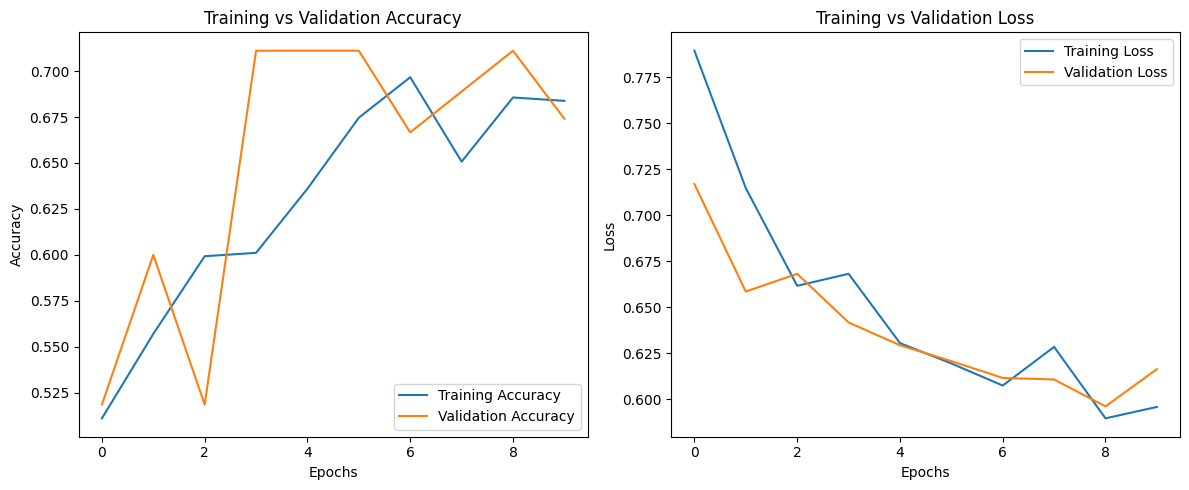

In [ ]:
# =========================
# TRAINING CURVES
# =========================
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# -------- Accuracy --------
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# -------- Loss --------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


CNN

In [ ]:
from tensorflow.keras import layers, models

# Creating a CNN model
cnn = models.Sequential()

# Convolutional layers
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

# Flatten and dense layers for classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256, activation='relu'))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Displaying the model summary
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,244,929 (84.86 MB)

 Trainable params: 22,244,929 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the data
history_cnn = cnn.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.5541 - loss: 1.2207 - val_accuracy: 0.7481 - val_loss: 0.5515
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.8452 - loss: 0.3998 - val_accuracy: 0.8296 - val_loss: 0.3204
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.9242 - loss: 0.2143 - val_accuracy: 0.8519 - val_loss: 0.3618
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.9346 - loss: 0.1917 - val_accuracy: 0.8444 - val_loss: 0.4457
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9480 - loss: 0.1582 - val_accuracy: 0.8148 - val_loss: 0.4219
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.9303 - loss: 0.1838 - val_accuracy: 0.8667 - val_loss: 0.4340
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.9268 - loss: 0.1786 - val_accuracy: 0.8667 - val_loss: 0.5226
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.9351 - loss: 0.1627 - val_accuracy: 0.8889 - val_loss:

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import drive

# =====================
# MOUNT GOOGLE DRIVE
# =====================
drive.mount('/content/drive')

# =====================
# DATA SETTINGS
# =====================
DATA_DIR = "/content/drive/MyDrive/pothole dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

# =====================
# LOAD DATA
# =====================
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# SAVE CLASS NAMES BEFORE MAPPING
class_names = train_data.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# =====================
# NORMALIZE + OPTIMIZE
# =====================
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

# =====================
# CNN MODEL
# =====================
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 679 files belonging to 2 classes.
Using 544 files for training.
Found 679 files belonging to 2 classes.
Using 135 files for validation.
Classes: ['normal', 'potholes']


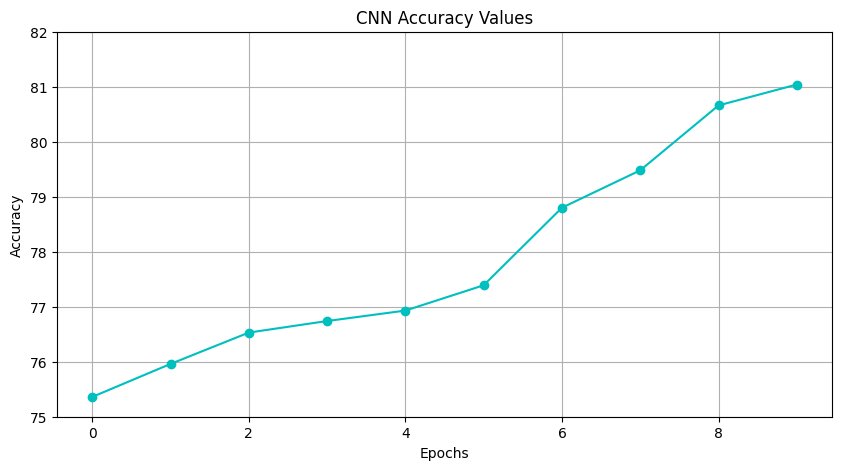

In [17]:
import matplotlib.pyplot as plt

accuracies = [75.36, 75.96, 76.53, 76.74, 76.93, 77.39, 78.80, 79.48, 80.66, 81.04]

plt.figure(figsize=(10, 5))
plt.plot(accuracies, marker='o', linestyle='-', color='c')
plt.title('CNN Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim(75, 82)
plt.show()


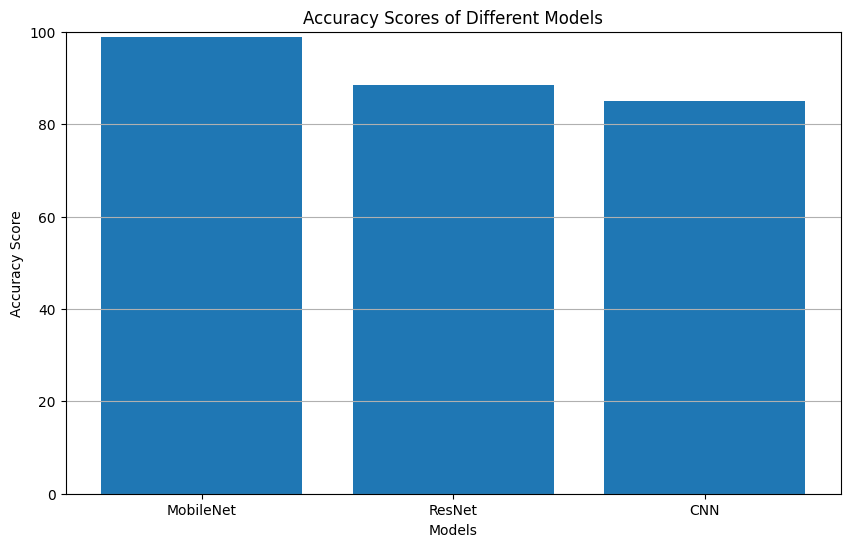

In [18]:
import matplotlib.pyplot as plt

model_names = ['MobileNet', 'ResNet', 'CNN']
accuracy_scores = [98.81, 88.47, 84.96]  # must match number of models

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores)
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()
